alpha is equal to 0.4 with nr equal to 10


100%|██████████| 1000/1000 [21:31<00:00,  1.29s/it]


k_values[0]: 0.05
alpha is equal to 0.5 with nr equal to 10


100%|██████████| 1000/1000 [22:51<00:00,  1.37s/it]


k_values[0]: 0.05
alpha is equal to 0.6 with nr equal to 10


100%|██████████| 1000/1000 [25:28<00:00,  1.53s/it]


k_values[0]: 0.05
alpha is equal to 0.4 with nr equal to 20


100%|██████████| 1000/1000 [23:34<00:00,  1.41s/it]


k_values[0]: 0.05
alpha is equal to 0.5 with nr equal to 20


100%|██████████| 1000/1000 [23:09<00:00,  1.39s/it]


k_values[0]: 0.05
alpha is equal to 0.6 with nr equal to 20


100%|██████████| 1000/1000 [28:29<00:00,  1.71s/it]


k_values[0]: 0.05
alpha is equal to 0.4 with nr equal to 50


100%|██████████| 1000/1000 [34:20<00:00,  2.06s/it]


k_values[0]: 0.05
alpha is equal to 0.5 with nr equal to 50


100%|██████████| 1000/1000 [24:11<00:00,  1.45s/it]


k_values[0]: 0.05
alpha is equal to 0.6 with nr equal to 50


100%|██████████| 1000/1000 [24:23<00:00,  1.46s/it]


k_values[0]: 0.05
alpha is equal to 0.4 with nr equal to 100


100%|██████████| 1000/1000 [25:25<00:00,  1.53s/it]


k_values[0]: 0.05
alpha is equal to 0.5 with nr equal to 100


100%|██████████| 1000/1000 [23:30<00:00,  1.41s/it]


k_values[0]: 0.05
alpha is equal to 0.6 with nr equal to 100


100%|██████████| 1000/1000 [22:11<00:00,  1.33s/it]


k_values[0]: 0.05
alpha is equal to 0.4 with nr equal to 200


100%|██████████| 1000/1000 [25:01<00:00,  1.50s/it]


k_values[0]: 0.05
alpha is equal to 0.5 with nr equal to 200


100%|██████████| 1000/1000 [28:21<00:00,  1.70s/it]


k_values[0]: 0.05
alpha is equal to 0.6 with nr equal to 200


100%|██████████| 1000/1000 [29:07<00:00,  1.75s/it]


k_values[0]: 0.05
alpha is equal to 0.4 with nr equal to 500


100%|██████████| 1000/1000 [26:47<00:00,  1.61s/it]


k_values[0]: 0.05
alpha is equal to 0.5 with nr equal to 500


100%|██████████| 1000/1000 [25:54<00:00,  1.55s/it]


k_values[0]: 0.05
alpha is equal to 0.6 with nr equal to 500


100%|██████████| 1000/1000 [30:31<00:00,  1.83s/it]


k_values[0]: 0.05
alpha is equal to 0.4 with nr equal to 1000


100%|██████████| 1000/1000 [26:48<00:00,  1.61s/it]


k_values[0]: 0.05
alpha is equal to 0.5 with nr equal to 1000


100%|██████████| 1000/1000 [32:00<00:00,  1.92s/it]


k_values[0]: 0.05
alpha is equal to 0.6 with nr equal to 1000


100%|██████████| 1000/1000 [34:29<00:00,  2.07s/it]


k_values[0]: 0.05


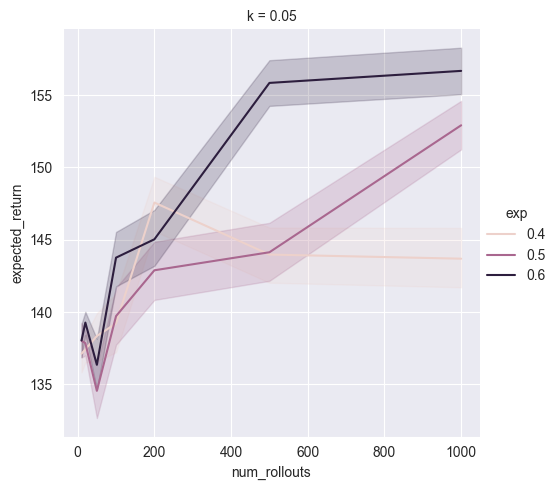

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import seaborn as sns
from stoch_mcts.game.game import Trap
from stoch_mcts.mcts.mcts import MCTS
from stoch_mcts.mcts.selector import ProgressiveWidening, AbstractionRefining, sampler
from stoch_mcts.mcts.backpropagator import *
from stoch_mcts.trainer.trainer import run
from stoch_mcts.agent.agent import Agent
from stoch_mcts.mcts.selector import *
from stoch_mcts.mcts.evaluator import *


# Parameters
n_trials = 1000
num_rollouts = [10, 20, 50, 100, 200, 500, 1000]
k_values = [0.05]  # , 0.05, 1, 2]
pw_exponents = [0.4, 0.5, 0.6]
ar_exponent = 0.1
ar_factor = 0.1
# Initialize the DataFrame
df = {'method': [], 'expected_return': [], 'num_rollouts': [], 'k': [], 'exp': [], 'time_minutes': []}

game = Trap()
for nr in num_rollouts:
    for k in k_values:
        for alpha in pw_exponents:
            mcts = MCTS(
                selector=Selector(action_selector=UCT(100), state_selector=ProgressiveWidening(k=k, alpha=alpha)),
                evaluator=RandomRollouts(1, 1000),
                backpropagator=TreeBackpropagator(discount=1)
            )
            # Progressive Widening simulation
            print(f"alpha is equal to {alpha} with nr equal to {nr}")
            # Measure the start time
            start_time = time.time()

            # Progressive Widening simulation
            result = run(game, Agent(mcts), n_trials, nr)

            # Measure the end time
            end_time = time.time()

            # Calculate the time taken in minutes
            time_taken = (end_time - start_time) / 60

            # Replicate the rows according to the number of elements in result
            num_results = len(result)
            df['method'].extend([f'PW{alpha}'] * num_results)
            df['exp'].extend([alpha] * num_results)
            df['k'].extend([k] * num_results)
            df['num_rollouts'].extend([nr] * num_results)
            df['expected_return'].extend(result)
            df['time_minutes'].extend([time_taken] * num_results)

            df_ = pd.DataFrame(df)
            try:
                df_['expected_return'] = df_['expected_return'].astype(float)
            except Exception as e:
                print("Errore nella conversione di 'expected_return':", e)

            # Verifica il contenuto di 'k_values'
            print("k_values[0]:", k_values[0])

            # Carica un DataFrame da un file CSV e concatenalo con 'df_'
            try:
                df_csv = pd.read_csv(f"df/df_{k_values[0]}_n_prova.csv")
                df_csv.drop_duplicates(inplace=True)
                df_ = pd.concat([df_, df_csv], ignore_index=True)
            except Exception as e:
                print("Errore nella lettura o concatenazione del CSV:", e)

            # Salva il DataFrame risultante
            try:
                df_.to_csv(f"df/df_{k_values[0]}_n_prova.csv", index=False)
            except Exception as e:
                print("Errore nel salvataggio del CSV:", e)
# Convert to DataFrame and visualize the results
df_ = pd.DataFrame(df)
df_['expected_return'] = df_['expected_return'].astype(float)
df_ = pd.concat([df_, pd.read_csv(f"df/df_{k_values[0]}_n_prova.csv")])
df_.to_csv(f"df/df_{k_values[0]}.csv", index=False)
sns.relplot(data=df_, x='num_rollouts', y='expected_return', hue='exp', kind='line', col='k',
            facet_kws={'sharey': True, 'sharex': True})
# Save the plot
plt.savefig('mrp_PROVA.png')
plt.show()